# Los Angeles Crime

Source: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

Dataset breakdown: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

Purpose: Give the individual a better understanding of crime in Los Angeles.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
path = r'C:\Users\Mouth\Documents\Datasets\Local Projects\LA_Crime\Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
df.iloc[:,0:14].head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H


In [5]:
df.iloc[:,14:].head()

,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970760 entries, 0 to 970759
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           970760 non-null  int64  
 1   Date Rptd       970760 non-null  object 
 2   DATE OCC        970760 non-null  object 
 3   TIME OCC        970760 non-null  int64  
 4   AREA            970760 non-null  int64  
 5   AREA NAME       970760 non-null  object 
 6   Rpt Dist No     970760 non-null  int64  
 7   Part 1-2        970760 non-null  int64  
 8   Crm Cd          970760 non-null  int64  
 9   Crm Cd Desc     970760 non-null  object 
 10  Mocodes         829240 non-null  object 
 11  Vict Age        970760 non-null  int64  
 12  Vict Sex        835948 non-null  object 
 13  Vict Descent    835938 non-null  object 
 14  Premis Cd       970746 non-null  float64
 15  Premis Desc     970177 non-null  object 
 16  Weapon Used Cd  325607 non-null  float64
 17  Weapon Des

In [7]:
df.shape

(970760, 28)

## Data Cleaning

In [8]:
# Drop unecessary columns
df.drop(columns=[
    'AREA',
    'Rpt Dist No',
    'Part 1-2',
    'Crm Cd',
    'Mocodes',
    'Premis Cd',
    'Weapon Used Cd',
    'Status',
    'Crm Cd 1', 
    'Crm Cd 2', 
    'Crm Cd 3',
    'Crm Cd 4', 
    'Cross Street', 
    'LAT', 
    'LON'
], inplace= True)

In [9]:
# Rename columns
df.rename(columns= lambda header: header.lower().replace(" ", "_"), inplace= True)

In [10]:
# Confirm dropped and renamed columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970760 entries, 0 to 970759
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   dr_no         970760 non-null  int64 
 1   date_rptd     970760 non-null  object
 2   date_occ      970760 non-null  object
 3   time_occ      970760 non-null  int64 
 4   area_name     970760 non-null  object
 5   crm_cd_desc   970760 non-null  object
 6   vict_age      970760 non-null  int64 
 7   vict_sex      835948 non-null  object
 8   vict_descent  835938 non-null  object
 9   premis_desc   970177 non-null  object
 10  weapon_desc   325607 non-null  object
 11  status_desc   970760 non-null  object
 12  location      970760 non-null  object
dtypes: int64(3), object(10)
memory usage: 96.3+ MB


In [11]:
# Check for duplicate rows
if df.duplicated().any():
    print("Duplicates have been found!")
    # Show duplicate rows
    duplicates = df[df_clean.duplicated()]
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicates found")


No duplicates found


In [12]:
# Check for missing values
missing_value_count = df.isna().sum()
print("Missing Values Per Column: ") 
print(missing_value_count.sort_values(ascending=False))

# Calculate the percent of data missing per column
percent_missing_col = round((missing_value_count.sort_values(ascending=False)/df.shape[0]) * 100, 2)
print("\nPercent Missing Per Column:")
print(percent_missing_col)

# Caluclate percent of data missing
total_cells = np.product(df.shape)
total_missing = missing_value_count.sum()
percent_missing = round((total_missing/total_cells) * 100, 2)
print(f"\nPercent Missing: {percent_missing}\n")

Missing Values Per Column: 
weapon_desc     645153
vict_descent    134822
vict_sex        134812
premis_desc        583
dr_no                0
date_rptd            0
date_occ             0
time_occ             0
area_name            0
crm_cd_desc          0
vict_age             0
status_desc          0
location             0
dtype: int64

Percent Missing Per Column:
weapon_desc     66.46
vict_descent    13.89
vict_sex        13.89
premis_desc      0.06
dr_no            0.00
date_rptd        0.00
date_occ         0.00
time_occ         0.00
area_name        0.00
crm_cd_desc      0.00
vict_age         0.00
status_desc      0.00
location         0.00
dtype: float64

Percent Missing: 7.25



In [13]:
# Check missing values in weapon_desc
df['weapon_desc'].unique()

array([nan, 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'VEHICLE',
       'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT',
       'BELT FLAILING INSTRUMENT/CHAIN', 'HAND GUN', 'UNKNOWN FIREARM',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIXED OBJECT',
       'KITCHEN KNIFE', 'MACHETE', 'UNKNOWN TYPE CUTTING INSTRUMENT',
       'MACE/PEPPER SPRAY', 'STICK', 'OTHER KNIFE', 'PHYSICAL PRESENCE',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'HAMMER',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SEMI-AUTOMATIC PISTOL',
       'SIMULATED GUN', 'RAZOR', 'OTHER FIREARM', 'FOLDING KNIFE',
       'PIPE/METAL PIPE', 'ROCK/THROWN OBJECT', 'RIFLE',
       'OTHER CUTTING INSTRUMENT', 'FIRE', 'REVOLVER', 'BOTTLE',
       'SCISSORS', 'SWITCH BLADE', 'BRASS KNUCKLES', 'CLUB/BAT',
       'BLUNT INSTRUMENT', 'BOARD', 'STUN GUN', 'CLEAVER', 'RAZOR BLADE',
       'SCREWDRIVER', 'SHOTGUN', 'CONCRETE BLOCK/BRICK',
       'CAUSTIC CHEMICAL/POISON', 'SEMI-AUTOMATIC RIFLE',
       'SCALDING LIQUID', 

In [14]:
# Fill nan values in weapon_desc column with 'unknown', indicating weapon used in crime is unknown
df['weapon_desc'].fillna('unknown', inplace= True)

In [15]:
# Captilize the first letters of every major word for the aestheticsssss
df['weapon_desc'] = df['weapon_desc'].apply(lambda x: x.title())

In [16]:
# Confirm values have are lowercase
df['weapon_desc'].unique()

array(['Unknown', 'Strong-Arm (Hands, Fist, Feet Or Bodily Force)',
       'Vehicle', 'Unknown Weapon/Other Weapon', 'Verbal Threat',
       'Belt Flailing Instrument/Chain', 'Hand Gun', 'Unknown Firearm',
       'Knife With Blade 6Inches Or Less', 'Fixed Object',
       'Kitchen Knife', 'Machete', 'Unknown Type Cutting Instrument',
       'Mace/Pepper Spray', 'Stick', 'Other Knife', 'Physical Presence',
       'Knife With Blade Over 6 Inches In Length', 'Hammer',
       'Air Pistol/Revolver/Rifle/Bb Gun', 'Semi-Automatic Pistol',
       'Simulated Gun', 'Razor', 'Other Firearm', 'Folding Knife',
       'Pipe/Metal Pipe', 'Rock/Thrown Object', 'Rifle',
       'Other Cutting Instrument', 'Fire', 'Revolver', 'Bottle',
       'Scissors', 'Switch Blade', 'Brass Knuckles', 'Club/Bat',
       'Blunt Instrument', 'Board', 'Stun Gun', 'Cleaver', 'Razor Blade',
       'Screwdriver', 'Shotgun', 'Concrete Block/Brick',
       'Caustic Chemical/Poison', 'Semi-Automatic Rifle',
       'Scalding Liq

In [17]:
# Check missing values in vict_descent 
df['vict_descent'].unique()

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'K', 'C', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [18]:
# Fill in nan values with 'X' to indicate victim descent is unknown
df['vict_descent'] = df['vict_descent'].fillna("X")

In [19]:
# Inspect '-' values in column
df[df['vict_descent'] == '-']

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location
755733,230908075,04/12/2023 12:00:00 AM,03/30/2023 12:00:00 AM,1200,Van Nuys,DOCUMENT FORGERY / STOLEN FELONY,38,M,-,OTHER BUSINESS,Unknown,Invest Cont,15300 MAGNOLIA BL
807232,232012240,06/29/2023 12:00:00 AM,06/29/2023 12:00:00 AM,2115,Olympic,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,-,-,AUTO SUPPLY STORE*,Unknown,Invest Cont,1900 S WESTERN AV


In [20]:
# Drop rows with '-' in vict_descent column
df.drop(df[df['vict_descent'] == '-'].index, inplace= True)

In [21]:
# Confirm nan values have been filled and '-' dropped
df['vict_descent'].unique()

array(['O', 'X', 'H', 'B', 'W', 'A', 'K', 'C', 'J', 'F', 'I', 'V', 'S',
       'P', 'Z', 'G', 'U', 'D', 'L'], dtype=object)

In [22]:
# Add a race column to indicate race like white, black, asian, pacific islander, american indian, etc.
condlist = [
    df['vict_descent'].isin(['A', 'C', 'D', 'F', 'J', 'K', 'L', 'V']), # Asian
    df['vict_descent'].isin(['G', 'P', 'S', 'U']), # Pacific Islander
    df['vict_descent'] == 'B', # Black
    df['vict_descent'] == 'W', # White
    df['vict_descent'] == 'Z', # Asian Indian
    df['vict_descent'] == 'H', # Hispanic/Latin
    df['vict_descent'] == 'I', # Native American
    df['vict_descent'] == 'O', # Other
    df['vict_descent'] == 'X', # Unknown
]

race_list = ["Asian", "Pacific Islander", "Black", "White", "Asian Indian", 
             "Hispanic/Latin", "Native American", "Other", "Unknown"]

df['vict_race'] = np.select(condlist, race_list, 'Unknown')

In [23]:
# Check if new column has been added 
df.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_race
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,Unknown,Adult Arrest,1900 S LONGWOOD AV,Other
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),Unknown,Invest Cont,1000 S FLOWER ST,Other
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Invest Cont,1400 W 37TH ST,Unknown
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,Unknown,Invest Cont,14000 RIVERSIDE DR,Other
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,Unknown,Invest Cont,1900 TRANSIENT,Hispanic/Latin


In [24]:
# Replace letters with full word of descent (ex. W - White, B - Black, F - Filipino) in vict_descent column

# Create a dictionary of vict_descent letters as keys and full words as value
descent_dict = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Loatian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}

# Use the descent_dict to change the single letter to its corresponding full word value
df['vict_descent'] = df['vict_descent'].apply(lambda x: descent_dict[x])

In [25]:
# Confirm full word descents
df.head(5)

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_race
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,VEHICLE - STOLEN,0,M,Other,STREET,Unknown,Adult Arrest,1900 S LONGWOOD AV,Other
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,BURGLARY FROM VEHICLE,47,M,Other,BUS STOP/LAYOVER (ALSO QUERY 124),Unknown,Invest Cont,1000 S FLOWER ST,Other
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,BIKE - STOLEN,19,X,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Invest Cont,1400 W 37TH ST,Unknown
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,Other,CLOTHING STORE,Unknown,Invest Cont,14000 RIVERSIDE DR,Other
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,Hispanic/Latin,SIDEWALK,Unknown,Invest Cont,1900 TRANSIENT,Hispanic/Latin


In [26]:
# Check missing values in vict_sex
df['vict_sex'].unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [27]:
# Fill in nan values with 'X' indicating victim sex is unknown
df['vict_sex'] = df['vict_sex'].fillna("X")

In [28]:
# Check 'H' values
df[df['vict_sex'] == 'H']

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_race
17607,200714556,10/05/2020 12:00:00 AM,10/05/2020 12:00:00 AM,200,Wilshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",35,H,Hispanic/Latin,STREET,Pipe/Metal Pipe,Invest Cont,15TH ST,Hispanic/Latin
21728,200708374,04/14/2020 12:00:00 AM,04/14/2020 12:00:00 AM,1300,Wilshire,BURGLARY FROM VEHICLE,33,H,Filipino,STREET,Unknown,Invest Cont,8500 COLGATE AV,Asian
30514,202017825,11/29/2020 12:00:00 AM,11/29/2020 12:00:00 AM,1530,Olympic,INTIMATE PARTNER - SIMPLE ASSAULT,25,H,Hispanic/Latin,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","Strong-Arm (Hands, Fist, Feet Or Bodily Force)",Adult Other,1600 ARAPAHOE ST,Hispanic/Latin
38047,200204197,01/03/2020 12:00:00 AM,01/03/2020 12:00:00 AM,2200,Rampart,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",25,H,Filipino,ALLEY,Unknown,Invest Cont,1600 W 2ND ST,Asian
57038,201310830,05/13/2020 12:00:00 AM,05/09/2020 12:00:00 AM,1716,Newton,THEFT PLAIN - PETTY ($950 & UNDER),49,H,Filipino,MAIL BOX,Unknown,Invest Cont,2300 WALL ST,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959256,241105236,02/02/2024 12:00:00 AM,02/01/2024 12:00:00 AM,1319,Northeast,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",33,H,Filipino,MEDICAL MARIJUANA FACILITIES/BUSINESSES,Unknown,Invest Cont,SAN FERNANDO RD,Asian
961224,242009738,06/23/2024 12:00:00 AM,06/22/2024 12:00:00 AM,1000,Olympic,BURGLARY FROM VEHICLE,24,H,Filipino,STREET,Unknown,Invest Cont,400 S ALEXANDRIA AV,Asian
963975,240309595,04/23/2024 12:00:00 AM,04/22/2024 12:00:00 AM,2345,Southwest,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,22,H,Unknown,STREET,Unknown,Invest Cont,3500 8TH AV,Unknown
964249,240116114,08/03/2024 12:00:00 AM,08/03/2024 12:00:00 AM,300,Central,THEFT PLAIN - PETTY ($950 & UNDER),25,H,Filipino,SIDEWALK,Unknown,Invest Cont,300 S SPRING ST,Asian


In [29]:
# Drop rows with 'H'
df.drop(df[df['vict_sex'] == 'H'].index, inplace= True)

In [30]:
# Confirm nan values have been filled and 'H' values have been dropped
df['vict_sex'].unique()

array(['M', 'X', 'F'], dtype=object)

In [31]:
# Rename victim sex to display full words like Male, Female, and Unknown
sex_dict = {
    "M": "Male",
    "F": "Female",
    "X": "Unknown"
}

df['vict_sex'] = df['vict_sex'].apply(lambda x: sex_dict[x]) 

In [32]:
# Confirm victim sex has been changed
df.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_race
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,VEHICLE - STOLEN,0,Male,Other,STREET,Unknown,Adult Arrest,1900 S LONGWOOD AV,Other
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,BURGLARY FROM VEHICLE,47,Male,Other,BUS STOP/LAYOVER (ALSO QUERY 124),Unknown,Invest Cont,1000 S FLOWER ST,Other
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,BIKE - STOLEN,19,Unknown,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Invest Cont,1400 W 37TH ST,Unknown
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,Other,CLOTHING STORE,Unknown,Invest Cont,14000 RIVERSIDE DR,Other
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,Male,Hispanic/Latin,SIDEWALK,Unknown,Invest Cont,1900 TRANSIENT,Hispanic/Latin


In [33]:
# Check premis_desc for missing values
df[df['premis_desc'].isna()]

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_race
3158,201300955,09/01/2020 12:00:00 AM,09/01/2020 12:00:00 AM,2030,Newton,ROBBERY,0,Male,Hispanic/Latin,NaN,Rifle,Invest Cont,6500 S MAIN ST,Hispanic/Latin
3830,201808344,03/17/2020 12:00:00 AM,03/17/2020 12:00:00 AM,2125,Southeast,ROBBERY,0,Unknown,Unknown,NaN,Shotgun,Invest Cont,9300 S BROADWAY,Unknown
3915,201513163,07/27/2020 12:00:00 AM,07/27/2020 12:00:00 AM,630,N Hollywood,BURGLARY,0,Male,Other,NaN,Unknown,Invest Cont,5500 CLEON AV,Other
4006,201000898,10/03/2020 12:00:00 AM,10/03/2020 12:00:00 AM,345,West Valley,BURGLARY,0,Male,White,NaN,Unknown,Invest Cont,7500 WOODLEY AV,White
7298,200110014,04/03/2020 12:00:00 AM,01/15/2020 12:00:00 AM,1640,Central,THEFT PLAIN - PETTY ($950 & UNDER),0,Unknown,Unknown,NaN,Unknown,Adult Other,700 S BROADWAY,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960402,241205368,01/23/2024 12:00:00 AM,01/23/2024 12:00:00 AM,525,77th Street,BURGLARY,0,Unknown,Unknown,NaN,Unknown,Invest Cont,6000 S WESTERN AV,Unknown
963271,240307329,03/06/2024 12:00:00 AM,03/06/2024 12:00:00 AM,10,Southwest,ROBBERY,57,Female,Other,NaN,"Strong-Arm (Hands, Fist, Feet Or Bodily Force)",Invest Cont,3400 EXPOSITION BL,Other
964594,242106522,03/04/2024 12:00:00 AM,03/04/2024 12:00:00 AM,440,Topanga,BURGLARY,0,Male,White,NaN,Unknown Weapon/Other Weapon,Invest Cont,21300 DEERING CT,White
967033,241505109,01/23/2024 12:00:00 AM,01/23/2024 12:00:00 AM,330,N Hollywood,BURGLARY,0,Unknown,Unknown,NaN,Unknown,Invest Cont,10800 CHANDLER BL,Unknown


In [34]:
# Fill nan values with 'unknown' indicating the premise for which the crime took place is unknown
df['premis_desc'] = df['premis_desc'].fillna('unknown')

In [35]:
# Captilize the first letters of every major word
df['premis_desc'] = df['premis_desc'].apply(lambda x: x.title())

In [36]:
# Confirm premis_desc values has been changed
df['premis_desc'].unique()

array(['Street', 'Bus Stop/Layover (Also Query 124)',
       'Multi-Unit Dwelling (Apartment, Duplex, Etc)', 'Clothing Store',
       'Sidewalk', 'Single Family Dwelling', 'Cell Phone Store',
       'Cyberspace', 'Website', 'Other Business', 'Parking Lot',
       'Other Residence', 'Automated Teller Machine (Atm)',
       'Department Store', 'Public Storage', 'Garage/Carport',
       'Office Building/Office', 'Equipment Rental', 'Police Facility',
       'Mta Bus', 'Specialty School/Other', 'Bank',
       'Government Facility (Federal,State, County & City)',
       'Skating Rink*', 'Bus Stop', 'Junior High School', 'Other/Outside',
       'Alley', 'Vehicle, Passenger/Truck',
       'Abandoned Building Abandoned House',
       'Transportation Facility (Airport)', 'Motel', 'Hospital',
       'Bus, School, Church', 'Other Premise', 'Storage Shed',
       'Other Store', 'High School', 'Mail Box', 'Hotel',
       'Night Club (Open Evenings Only)', 'Finance Company',
       'Park/Playground'

In [37]:
# Check if there are stil missing values
df.isna().sum()

dr_no           0
date_rptd       0
date_occ        0
time_occ        0
area_name       0
crm_cd_desc     0
vict_age        0
vict_sex        0
vict_descent    0
premis_desc     0
weapon_desc     0
status_desc     0
location        0
vict_race       0
dtype: int64

In [38]:
# Verify column data types are correct
df.dtypes

dr_no            int64
date_rptd       object
date_occ        object
time_occ         int64
area_name       object
crm_cd_desc     object
vict_age         int64
vict_sex        object
vict_descent    object
premis_desc     object
weapon_desc     object
status_desc     object
location        object
vict_race       object
dtype: object

In [39]:
# Convert dates to datetime
df['date_rptd'] = pd.to_datetime(df['date_rptd'])
df['date_occ'] = pd.to_datetime(df['date_occ'])

In [40]:
# Verify dates have been converted to datetime
df.dtypes

dr_no                    int64
date_rptd       datetime64[ns]
date_occ        datetime64[ns]
time_occ                 int64
area_name               object
crm_cd_desc             object
vict_age                 int64
vict_sex                object
vict_descent            object
premis_desc             object
weapon_desc             object
status_desc             object
location                object
vict_race               object
dtype: object

In [41]:
# Captilize the first letters of every major word for crm_cd_desc and location for aesthetic appeeeeaaaalllll
df['crm_cd_desc'] = df['crm_cd_desc'].apply(lambda x: x.title())
df['location'] = df['location'].apply(lambda x: x.title())

In [42]:
# Confirm the aesthetic changes have been made
df.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_race
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,Vehicle - Stolen,0,Male,Other,Street,Unknown,Adult Arrest,1900 S Longwood Av,Other
1,200106753,2020-02-09,2020-02-08,1800,Central,Burglary From Vehicle,47,Male,Other,Bus Stop/Layover (Also Query 124),Unknown,Invest Cont,1000 S Flower St,Other
2,200320258,2020-11-11,2020-11-04,1700,Southwest,Bike - Stolen,19,Unknown,Unknown,"Multi-Unit Dwelling (Apartment, Duplex, Etc)",Unknown,Invest Cont,1400 W 37Th St,Unknown
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,Shoplifting-Grand Theft ($950.01 & Over),19,Male,Other,Clothing Store,Unknown,Invest Cont,14000 Riverside Dr,Other
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,Theft Of Identity,28,Male,Hispanic/Latin,Sidewalk,Unknown,Invest Cont,1900 Transient,Hispanic/Latin


In [43]:
# Inspect area_name for consistent values
df['area_name'].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
       'West LA', 'Olympic', 'Hollenbeck', 'Topanga', 'Northeast',
       '77th Street', 'Pacific', 'N Hollywood', 'Harbor', 'Foothill',
       'Devonshire'], dtype=object)

In [44]:
# Inspect status_desc for consistent values
df['status_desc'].value_counts()

Invest Cont     774679
Adult Other     106528
Adult Arrest     84431
Juv Arrest        3177
Juv Other         1826
UNK                  7
Name: status_desc, dtype: int64

In [45]:
# Replace 'UNK' values with 'Invest Cont' 
df['status_desc'].replace("UNK", "Invest Cont", inplace= True)

In [46]:
# Confirm UNK is no longer exists
df['status_desc'].value_counts()

Invest Cont     774686
Adult Other     106528
Adult Arrest     84431
Juv Arrest        3177
Juv Other         1826
Name: status_desc, dtype: int64

In [47]:
# Inspect location for consistent values
df['location'].unique()

array(['1900 S  Longwood                     Av',
       '1000 S  Flower                       St',
       '1400 W  37Th                         St', ...,
       '8900    Evanview                     Dr',
       '9500    La Cienega                   Bl',
       '1800 E  Martin Luther King Jr        Bl'], dtype=object)

In [48]:
# Fix white spaces in between words
df['location'] = df['location'].apply(lambda x: " ".join(x.split()))

In [49]:
# Check locatons for changes
df['location'].unique()

array(['1900 S Longwood Av', '1000 S Flower St', '1400 W 37Th St', ...,
       '8900 Evanview Dr', '9500 La Cienega Bl',
       '1800 E Martin Luther King Jr Bl'], dtype=object)

In [50]:
# Validate ranges of numerical columns
df.describe()

,dr_no,time_occ,vict_age
count,9.706480e+05,970648.000000,970648.000000
mean,2.194830e+08,1338.640221,29.212511
std,1.281107e+07,651.805780,21.945239
min,8.170000e+02,1.000000,-4.000000
25%,2.106045e+08,900.000000,0.000000
50%,2.208060e+08,1420.000000,30.000000
75%,2.308177e+08,1900.000000,44.000000
max,2.499187e+08,2359.000000,120.000000


In [51]:
# Check for ages less than or equal to 0
df[df['vict_age'] <= 0]['vict_age'].value_counts()

 0    253465
-1        94
-2        27
-3         5
-4         3
Name: vict_age, dtype: int64

In [52]:
# Drop rows with ages less than or equal to 0
df.drop(df[df['vict_age'] <= 0].index, inplace= True) 

In [53]:
# Check for ages greater than or equal to 100
df[df['vict_age'] >= 100]['vict_age'].value_counts()

120    1
Name: vict_age, dtype: int64

In [54]:
# Drop row with victim age of 120, aint nobody that old in LA
df.drop(df[df['vict_age'] >= 100].index, inplace= True)

In [55]:
# Confirm changes
df.describe()

,dr_no,time_occ,vict_age
count,7.170530e+05,717053.000000,717053.000000
mean,2.190294e+08,1325.762164,39.543967
std,1.258736e+07,651.318443,15.599533
min,1.030447e+07,1.000000,2.000000
25%,2.105098e+08,900.000000,28.000000
50%,2.206207e+08,1400.000000,37.000000
75%,2.307110e+08,1845.000000,50.000000
max,2.499187e+08,2359.000000,99.000000


In [56]:
# Add age group feature
cond_list = [
    df['vict_age'] <= 14, # Child (0-14)
    (df['vict_age'] >= 15) & (df['vict_age'] <= 18), # Teen (15-18)
    (df['vict_age'] >= 19) & (df['vict_age'] <= 25), # Young Adult (19-25)
    (df['vict_age'] >= 26) & (df['vict_age'] <= 40), # Adult (26-40)
    (df['vict_age'] >= 41) & (df['vict_age'] <= 60), # Middle-Aged (41-60)
    (df['vict_age'] >= 61), # Senior (61+)

]

age_groups = ["Child (0-14)", "Teen (15-18)", "Young Adult (19-25)",
              "Adult (26-40)", "Middle-Aged (41-60)", "Senior (61+)"]

df['age_groups'] = np.select(cond_list, age_groups, "Invalid Age")

In [57]:
# Display cleaned dataset
df.head()

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,vict_race,age_groups
1,200106753,2020-02-09,2020-02-08,1800,Central,Burglary From Vehicle,47,Male,Other,Bus Stop/Layover (Also Query 124),Unknown,Invest Cont,1000 S Flower St,Other,Middle-Aged (41-60)
2,200320258,2020-11-11,2020-11-04,1700,Southwest,Bike - Stolen,19,Unknown,Unknown,"Multi-Unit Dwelling (Apartment, Duplex, Etc)",Unknown,Invest Cont,1400 W 37Th St,Unknown,Young Adult (19-25)
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,Shoplifting-Grand Theft ($950.01 & Over),19,Male,Other,Clothing Store,Unknown,Invest Cont,14000 Riverside Dr,Other,Young Adult (19-25)
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,Theft Of Identity,28,Male,Hispanic/Latin,Sidewalk,Unknown,Invest Cont,1900 Transient,Hispanic/Latin,Adult (26-40)
5,231808869,2023-04-04,2020-12-01,2300,Southeast,Theft Of Identity,41,Male,Hispanic/Latin,Single Family Dwelling,Unknown,Invest Cont,9900 Compton Av,Hispanic/Latin,Middle-Aged (41-60)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717053 entries, 1 to 970758
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dr_no         717053 non-null  int64         
 1   date_rptd     717053 non-null  datetime64[ns]
 2   date_occ      717053 non-null  datetime64[ns]
 3   time_occ      717053 non-null  int64         
 4   area_name     717053 non-null  object        
 5   crm_cd_desc   717053 non-null  object        
 6   vict_age      717053 non-null  int64         
 7   vict_sex      717053 non-null  object        
 8   vict_descent  717053 non-null  object        
 9   premis_desc   717053 non-null  object        
 10  weapon_desc   717053 non-null  object        
 11  status_desc   717053 non-null  object        
 12  location      717053 non-null  object        
 13  vict_race     717053 non-null  object        
 14  age_groups    717053 non-null  object        
dtypes: datetime64[ns]

In [59]:
df.shape

(717053, 15)

## Data Analysis

In [60]:
df['age_groups'].unique()

array(['Middle-Aged (41-60)', 'Young Adult (19-25)', 'Adult (26-40)',
       'Child (0-14)', 'Teen (15-18)', 'Senior (61+)'], dtype=object)

In [61]:
# Create a new column to sort the age groups from youngest to oldest when plotting
cond_list = [
    df['age_groups'] == 'Child (0-14)', # 1
    df['age_groups'] == 'Teen (15-18)', # 2
    df['age_groups'] == 'Young Adult (19-25)', # 3
    df['age_groups'] == 'Adult (26-40)', # 4
    df['age_groups'] == 'Middle-Aged (41-60)', # 5
    df['age_groups'] == 'Senior (61+)' # 6
]

order_list = [1,2,3,4,5,6]

# Add new age group order feature
df['age_group_order'] = np.select(cond_list, order_list, 0)

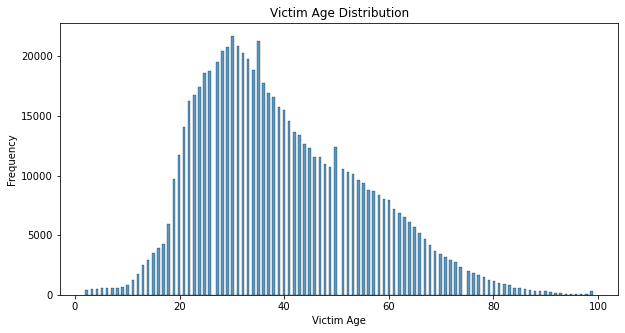

In [62]:
# Distribution of victim ages
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='vict_age')
plt.title("Victim Age Distribution")
plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.show()

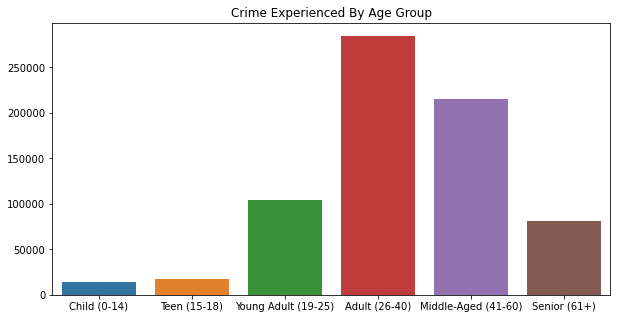

In [124]:
# Crimes experienced by age group
plt.figure(figsize=(10,5))
sns.countplot(data=df.sort_values(by=['age_group_order']), x='age_groups')
plt.title("Crime Experienced By Age Group")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [64]:
# Show count of each age group
print("Count:")
print(df['age_groups'].value_counts())

# Calculate the percentage of crime experienced by age group
print("\nPercentage:")
print(round(df['age_groups'].value_counts() / df.shape[0] * 100.0, 0))

Count:
Adult (26-40)          284617
Middle-Aged (41-60)    215469
Young Adult (19-25)    104545
Senior (61+)            81161
Teen (15-18)            17634
Child (0-14)            13627
Name: age_groups, dtype: int64

Percentage:
Adult (26-40)          40.0
Middle-Aged (41-60)    30.0
Young Adult (19-25)    15.0
Senior (61+)           11.0
Teen (15-18)            2.0
Child (0-14)            2.0
Name: age_groups, dtype: float64


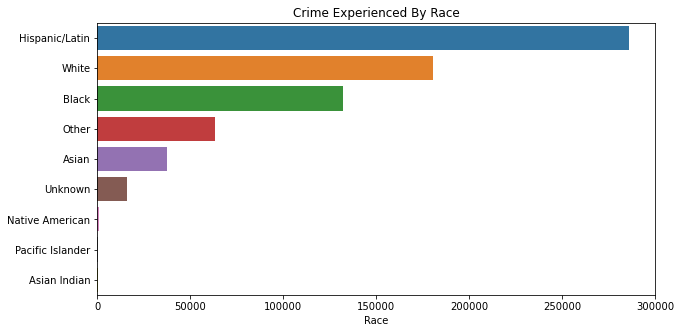

In [65]:
# Crimes experienced by race
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='vict_race', order=df['vict_race'].value_counts().index)
plt.title("Crime Experienced By Race")
plt.xlabel("Race")
plt.ylabel("")
plt.show()

In [66]:
# Show count of crimes experienced by race
print("Count: ")
print(df['vict_race'].value_counts())

# Percentage of crimes experienced by race
print("\nPercentage: ")
print(round(df['vict_race'].value_counts() / df.shape[0] * 100.0, 0))

Count: 
Hispanic/Latin      285867
White               180751
Black               131893
Other                63141
Asian                37239
Unknown              16145
Native American        946
Pacific Islander       558
Asian Indian           513
Name: vict_race, dtype: int64

Percentage: 
Hispanic/Latin      40.0
White               25.0
Black               18.0
Other                9.0
Asian                5.0
Unknown              2.0
Native American      0.0
Pacific Islander     0.0
Asian Indian         0.0
Name: vict_race, dtype: float64


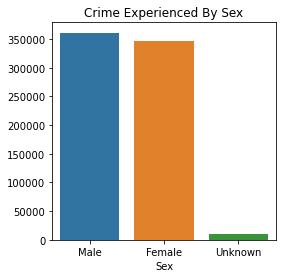

In [67]:
# Crimes experienced by sex
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='vict_sex', order=df['vict_sex'].value_counts().index)
plt.title("Crime Experienced By Sex")
plt.xlabel("Sex")
plt.ylabel("")
plt.show()

In [68]:
# Show count of crimes experienced by sex
print("Count: ")
print(df['vict_sex'].value_counts())

# Percentage of crimes experienced by sex
print("\nPercentage: ")
print(round(df['vict_sex'].value_counts() / df.shape[0] * 100.0, 0))

Count: 
Male       361055
Female     346315
Unknown      9683
Name: vict_sex, dtype: int64

Percentage: 
Male       50.0
Female     48.0
Unknown     1.0
Name: vict_sex, dtype: float64


In [75]:
# What are the top 10 common crimes in LA?
top10_crime = df['crm_cd_desc'].value_counts()[:10].reset_index()
top10_crime.columns = ['crime', 'count']
top10_crime

,crime,count
0,Battery - Simple Assault,73687
1,Theft Of Identity,58877
2,Burglary From Vehicle,58556
3,"Assault With Deadly Weapon, Aggravated Assault",51310
4,Intimate Partner - Simple Assault,46216
5,"Vandalism - Felony ($400 & Over, All Church Va...",44542
6,Theft Plain - Petty ($950 & Under),43882
7,Burglary,39656
8,Theft From Motor Vehicle - Grand ($950.01 And ...,33474
9,"Theft-Grand ($950.01 & Over)Excpt,Guns,Fowl,Li...",26214


In [85]:
# Percentage of top 10 crimes compared to all crimes
round(df['crm_cd_desc'].value_counts()[:10] / df.shape[0] * 100.0, 2)

Battery - Simple Assault                                    10.28
Theft Of Identity                                            8.21
Burglary From Vehicle                                        8.17
Assault With Deadly Weapon, Aggravated Assault               7.16
Intimate Partner - Simple Assault                            6.45
Vandalism - Felony ($400 & Over, All Church Vandalisms)      6.21
Theft Plain - Petty ($950 & Under)                           6.12
Burglary                                                     5.53
Theft From Motor Vehicle - Grand ($950.01 And Over)          4.67
Theft-Grand ($950.01 & Over)Excpt,Guns,Fowl,Livestk,Prod     3.66
Name: crm_cd_desc, dtype: float64

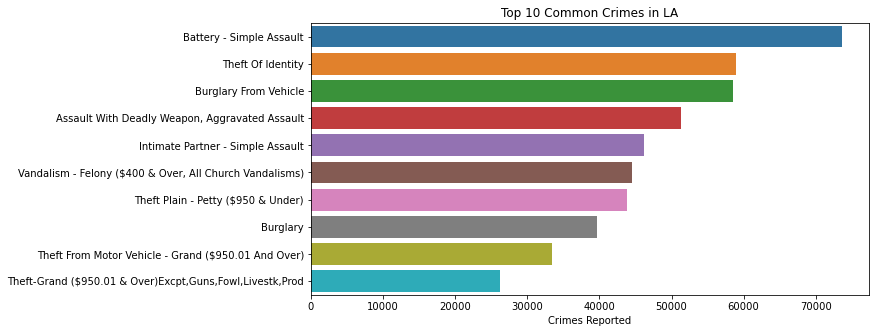

In [98]:
# Bar plot of top 10 common crimes
plt.figure(figsize=(10,5))
sns.barplot(data=top10_crime, y='crime', x='count')
plt.title("Top 10 Common Crimes in LA")
plt.xlabel("Crimes Reported")
plt.ylabel("")
plt.show()

In [126]:
# How many crimes are reported in each area?
print("Crimes Reported Per Area:")
print(df['area_name'].value_counts())

# Percentage form
print("\nPercentage Form:")
print(round(df['area_name'].value_counts() / df.shape[0] * 100.0, 2))

Crimes Reported Per Area:
Central        50417
Southwest      46122
77th Street    45477
Pacific        40665
Hollywood      38168
Southeast      36054
Olympic        35275
N Hollywood    35209
Wilshire       34668
Topanga        33553
Newton         32757
Van Nuys       32597
West LA        32335
Rampart        32265
West Valley    30293
Mission        29382
Northeast      28524
Devonshire     28459
Harbor         27147
Foothill       24096
Hollenbeck     23590
Name: area_name, dtype: int64

Percentage Form:
Central        7.03
Southwest      6.43
77th Street    6.34
Pacific        5.67
Hollywood      5.32
Southeast      5.03
Olympic        4.92
N Hollywood    4.91
Wilshire       4.83
Topanga        4.68
Newton         4.57
Van Nuys       4.55
West LA        4.51
Rampart        4.50
West Valley    4.22
Mission        4.10
Northeast      3.98
Devonshire     3.97
Harbor         3.79
Foothill       3.36
Hollenbeck     3.29
Name: area_name, dtype: float64


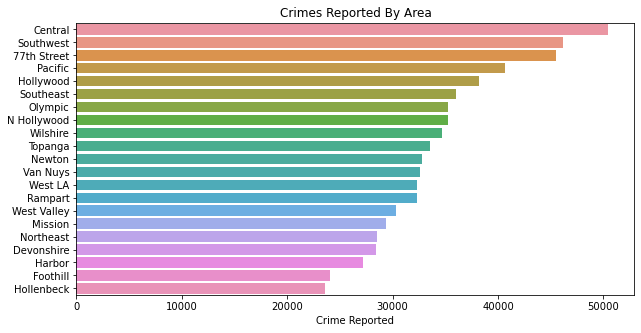

In [101]:
# Crimes reported by area plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='area_name', order=df['area_name'].value_counts().index)
plt.title("Crimes Reported By Area")
plt.xlabel("Crime Reported")
plt.ylabel("")
plt.show()

In [128]:
# Crimes reported by premise
print("Crimes Reported By Premise:")
print(df['premis_desc'].value_counts()[:10])

# Percentage form
print("\nPercentage Form:")
print(round(df['premis_desc'].value_counts()[:10] / df.shape[0] * 100.0, 2))

Crimes Reported By Premise:
Single Family Dwelling                          157787
Street                                          132469
Multi-Unit Dwelling (Apartment, Duplex, Etc)    111198
Parking Lot                                      45701
Sidewalk                                         37566
Vehicle, Passenger/Truck                         26483
Other Business                                   22343
Garage/Carport                                   14163
Driveway                                         11003
Restaurant/Fast Food                              6899
Name: premis_desc, dtype: int64

Percentage Form:
Single Family Dwelling                          22.00
Street                                          18.47
Multi-Unit Dwelling (Apartment, Duplex, Etc)    15.51
Parking Lot                                      6.37
Sidewalk                                         5.24
Vehicle, Passenger/Truck                         3.69
Other Business                                  

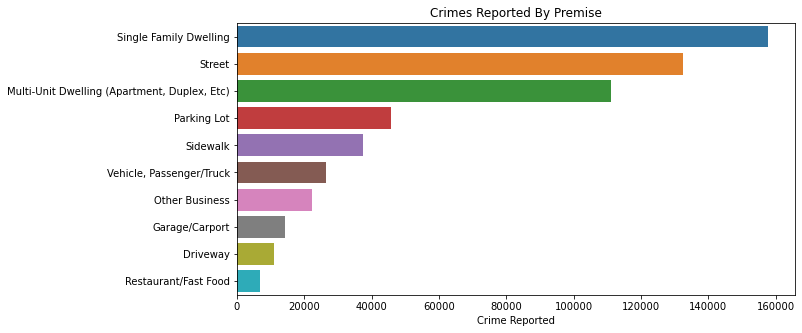

In [106]:
# Crimes reported by premise plot
top10_premise = df['premis_desc'].value_counts()[:10].reset_index()
top10_premise.columns = ['premise', 'count']

plt.figure(figsize=(10,5))
sns.barplot(data=top10_premise, y='premise', x='count')
plt.title("Crimes Reported By Premise")
plt.xlabel("Crime Reported")
plt.ylabel("")
plt.show()

In [107]:
# Crimes reported by weapon 
print("Crimes Reported By Weapon:")
print(df['weapon_desc'].value_counts()[:10])

# Percentage form
print("\nPercentage Form:")
print(round(df['weapon_desc'].value_counts()[:10] / df.shape[0] * 100.0, 2))

Crimes Reported By Weapon:
Unknown                                           417605
Strong-Arm (Hands, Fist, Feet Or Bodily Force)    165350
Unknown Weapon/Other Weapon                        30882
Verbal Threat                                      22142
Hand Gun                                           17335
Knife With Blade 6Inches Or Less                    6407
Semi-Automatic Pistol                               6232
Other Knife                                         5468
Unknown Firearm                                     5183
Mace/Pepper Spray                                   3462
Name: weapon_desc, dtype: int64

Percentage Form:
Unknown                                           58.24
Strong-Arm (Hands, Fist, Feet Or Bodily Force)    23.06
Unknown Weapon/Other Weapon                        4.31
Verbal Threat                                      3.09
Hand Gun                                           2.42
Knife With Blade 6Inches Or Less                   0.89
Semi-Automatic Pi

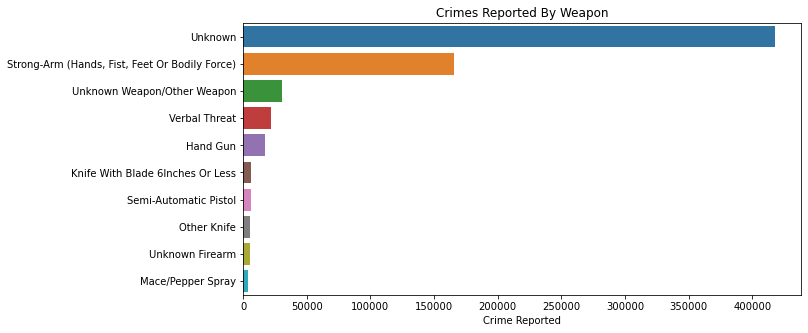

In [113]:
# Crimes reported by weapon plot
top10_weapon = df['weapon_desc'].value_counts()[:10].reset_index()
top10_weapon.columns = ['weapon', 'count']

plt.figure(figsize=(10,5))
sns.barplot(data=top10_weapon, y='weapon', x='count')
plt.title("Crimes Reported By Weapon")
plt.xlabel("Crime Reported")
plt.ylabel("")
plt.show()

In [112]:
# Crimes reported by status
print("Crimes Reported By Status:")
print(df['status_desc'].value_counts())

# Percentage form
print("\nPercentage Form:")
print(round(df['status_desc'].value_counts() / df.shape[0] * 100.0, 2))

Crimes Reported By Status:
Invest Cont     550333
Adult Other      97740
Adult Arrest     65027
Juv Arrest        2433
Juv Other         1520
Name: status_desc, dtype: int64

Percentage Form:
Invest Cont     76.75
Adult Other     13.63
Adult Arrest     9.07
Juv Arrest       0.34
Juv Other        0.21
Name: status_desc, dtype: float64


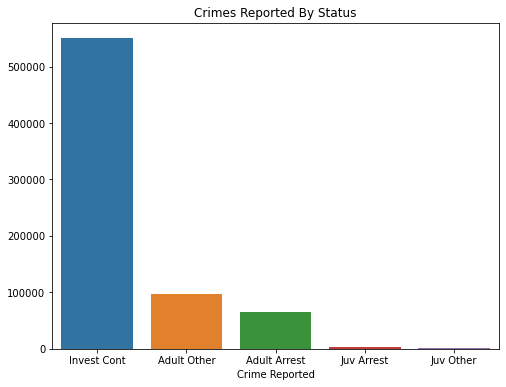

In [119]:
# Crimes reported by status plot
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='status_desc', order=df['status_desc'].value_counts().index)
plt.title("Crimes Reported By Status")
plt.xlabel("Crime Reported")
plt.ylabel("")
plt.show()

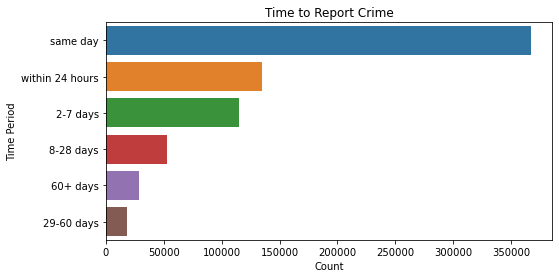

In [120]:
# What is the average time it takes to report a crime?
condlist = [
    ((df['date_rptd'] - df['date_occ']).dt.days == 0) , # same day
    ((df['date_rptd'] - df['date_occ']).dt.days == 1) , # Within 24 hours
    ((df['date_rptd'] - df['date_occ']).dt.days >= 2) & 
    ((df['date_rptd'] - df['date_occ']).dt.days <= 7), # 2-7 days
    ((df['date_rptd'] - df['date_occ']).dt.days >= 8) & 
    ((df['date_rptd'] - df['date_occ']).dt.days <= 28), # 8-28 days
    ((df['date_rptd'] - df['date_occ']).dt.days >= 29) & 
    ((df['date_rptd'] - df['date_occ']).dt.days <= 60), # 29-60 days
    ((df['date_rptd'] - df['date_occ']).dt.days > 60) # 60+ days
]

time_period = ["same day", "within 24 hours", "2-7 days", "8-28 days", "29-60 days", "60+ days"]

# Add new column to df
df['time_to_rpt'] = np.select(condlist, time_period, "Cannot be determined")

# Plot
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='time_to_rpt', order=df['time_to_rpt'].value_counts().index)
plt.title("Time to Report Crime")
plt.xlabel('Count')
plt.ylabel('Time Period')
plt.show()

In [122]:
# Percentages of time to report crime
round((df['time_to_rpt'].value_counts() / df.shape[0] * 100), 2)

same day           51.20
within 24 hours    18.82
2-7 days           15.99
8-28 days           7.35
60+ days            4.05
29-60 days          2.59
Name: time_to_rpt, dtype: float64